In [19]:
import os
import csv

path = {}
path['train'] = os.path.join(os.getcwd(), '20news-bydate-train')
path['test'] = os.path.join(os.getcwd(), '20news-bydate-test')

datacsvname = 'dataExploration.csv'
with open(datacsvname, 'w') as datacsv:
    csv_fields = ['ID']
    csv_fields += os.listdir(path['train'])
    csv_writer = csv.DictWriter(datacsv, fieldnames=csv_fields)
    csv_writer.writeheader()
    for tpart in path:
        rowdata = {'ID': tpart}
        for groupName in csv_fields[1:]:
            newsCount = len(os.listdir(os.path.join(path[tpart], groupName)))
            rowdata[groupName] = newsCount
        csv_writer.writerow(rowdata)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

df = pd.read_csv(datacsvname)
display(df)

,ID,sci.crypt,talk.religion.misc,soc.religion.christian,comp.sys.mac.hardware,sci.space,rec.sport.baseball,comp.windows.x,talk.politics.mideast,comp.sys.ibm.pc.hardware,...,rec.autos,rec.motorcycles,talk.politics.guns,rec.sport.hockey,talk.politics.misc,sci.electronics,comp.graphics,comp.os.ms-windows.misc,misc.forsale,sci.med
0,test,396,251,398,385,394,397,395,376,392,...,396,398,364,399,310,393,389,394,390,396
1,train,595,377,599,578,593,597,593,564,590,...,594,598,546,600,465,591,584,591,585,594


In [22]:
display(df[df['ID']=='train'])

,ID,sci.crypt,talk.religion.misc,soc.religion.christian,comp.sys.mac.hardware,sci.space,rec.sport.baseball,comp.windows.x,talk.politics.mideast,comp.sys.ibm.pc.hardware,...,rec.autos,rec.motorcycles,talk.politics.guns,rec.sport.hockey,talk.politics.misc,sci.electronics,comp.graphics,comp.os.ms-windows.misc,misc.forsale,sci.med
1,train,595,377,599,578,593,597,593,564,590,...,594,598,546,600,465,591,584,591,585,594


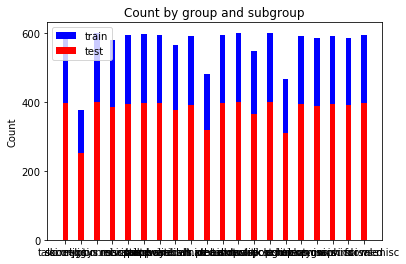

In [51]:
# BAD shows

# Refs:
# http://matplotlib.org/mpl_examples/pylab_examples/bar_stacked.py
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar

N = len(df.columns)-1

data_train = df[df['ID'] == 'train'].drop('ID', axis=1)
data_test = df[df['ID'] == 'test'].drop('ID', axis=1)

# print data_train.values

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
height = 0.35

p_train = plt.bar(ind, tuple(data_train.values[0]), width, color='blue')
p_test = plt.bar(ind, tuple(data_test.values[0]), width, color='red')

plt.ylabel('Count')
plt.title('Count by group and subgroup')
plt.xticks(ind,  tuple(os.listdir(path['train'])))
plt.yticks(np.arange(0, 800, 200))
plt.legend((p_train[0], p_test[0]), ('train', 'test'))

plt.show()

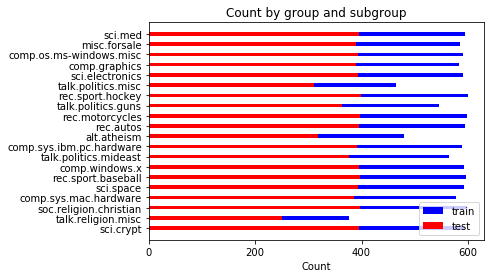

In [50]:
# Refs:
# http://matplotlib.org/mpl_examples/pylab_examples/bar_stacked.py
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

N = len(df.columns)-1

data_train = df[df['ID'] == 'train'].drop('ID', axis=1)
data_test = df[df['ID'] == 'test'].drop('ID', axis=1)

# print data_train.values

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
height = 0.35

p_train = plt.barh(ind, tuple(data_train.values[0]), height, color='blue')
p_test = plt.barh(ind, tuple(data_test.values[0]), height, color='red')

plt.xlabel('Count')
plt.title('Count by group and subgroup')
plt.yticks(ind,  tuple(os.listdir(path['train'])))
plt.xticks(np.arange(0, 800, 200))
plt.legend((p_train[0], p_test[0]), ('train', 'test'))

plt.show()

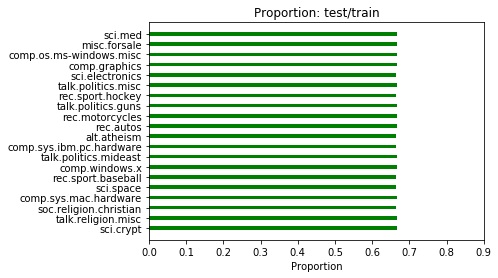

In [76]:
# show the proportion of every category

props = []
for cate in os.listdir(path['train']):
    prop = float(list(data_test[cate])[0])/list(data_train[cate])[0]
    props.append(prop)
   
props = np.array(props)


ind = np.arange(20)
height = 0.35
p_props_testVStrain = plt.barh(ind, tuple(props), height, color='green')

plt.xlabel('Proportion')
plt.title('Proportion: test/train')
plt.yticks(ind, tuple(os.listdir(path['train'])))
plt.xticks(np.arange(0, 1, 0.1))

plt.show()

In [77]:
print "sum of train: {}".format(sum([list(data_train[cate])[0] for cate in data_train.columns]))
print "sum of test: {}".format(sum([list(data_test[cate])[0] for cate in data_test.columns]))

sum of train: 11314
sum of test: 7532
